<a href="https://colab.research.google.com/github/Chadliu123/TibameAI/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train),(x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,45,123,254,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,24,216,253,253,234,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,33,253,253,253,253,187,4,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,161,253,253,253,244,85,0,0,0,0,0,0,18,177,197,197,70,0,0,0
9,0,0,0,0,0,0,0,53,224,253,253,253,187,0,0,0,0,0,0,21,190,253,253,217,46,0,0,0


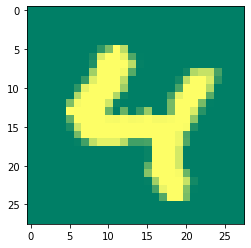

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import pandas as pd
import matplotlib.pyplot as plt
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="summer")
pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 只有一個神經元：binary cross-entropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元：categorical cross-entropy p1 log 1/q1 + ......
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
# batch：100`200(小圖片) 10`20(大圖片)
# epoch：整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000*2/200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=10,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
5400/5400 - 8s - loss: 0.2275 - accuracy: 0.9345 - val_loss: 0.1014 - val_accuracy: 0.9717
Epoch 2/50
5400/5400 - 8s - loss: 0.1016 - accuracy: 0.9692 - val_loss: 0.0830 - val_accuracy: 0.9765
Epoch 3/50
5400/5400 - 8s - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0768 - val_accuracy: 0.9790
Epoch 4/50
5400/5400 - 12s - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0848 - val_accuracy: 0.9767
Epoch 5/50
5400/5400 - 10s - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0847 - val_accuracy: 0.9775
Epoch 6/50
5400/5400 - 8s - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0854 - val_accuracy: 0.9772
Epoch 7/50


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9787


[0.0792890265583992, 0.9786999821662903]

In [ ]:
# 手動儲存：model.save("model.h5")
# if not os.path.exists("model.h5"):
#    newmodel/compile
# else:
#    load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# 不用再compile, 可以直接繼續fit
model.evaluate(x_test_norm, y_test_cat)

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in range(10)],
      columns=["{}(預測)".format(n) for n in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),970,0,0,2,0,0,3,1,3,1
1(原本),0,1125,2,0,0,1,3,1,3,0
2(原本),3,0,1006,2,3,0,4,9,4,1
3(原本),0,0,3,982,0,10,0,4,9,2
4(原本),1,1,5,1,950,1,3,1,2,17
5(原本),2,0,0,8,0,868,5,1,7,1
6(原本),3,2,1,1,2,2,947,0,0,0
7(原本),0,6,6,0,2,1,0,1003,3,7
8(原本),4,0,1,2,2,1,2,5,952,5
9(原本),1,3,0,4,6,5,1,3,2,984


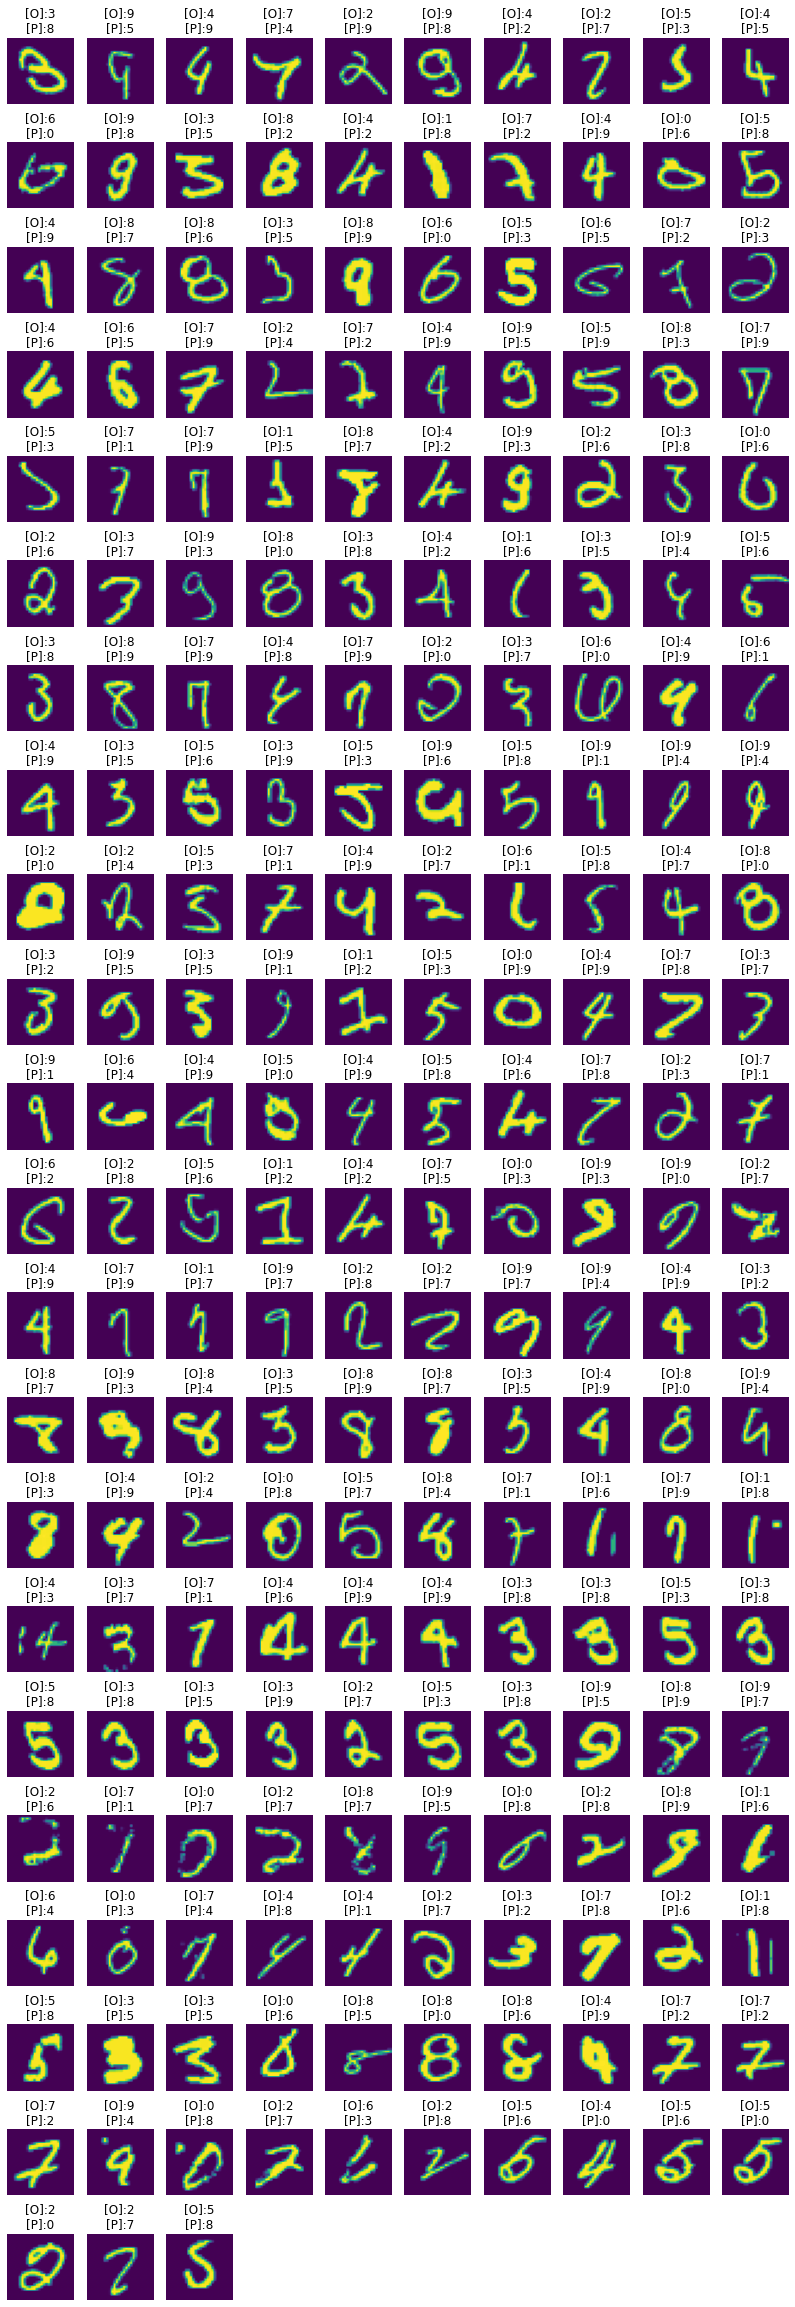

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

檔名1.png
0 的機率是: 0.0
1 的機率是: 0.0
2 的機率是: 0.0
3 的機率是: 0.0
4 的機率是: 0.0
5 的機率是: 0.001
6 的機率是: 0.015
7 的機率是: 0.0
8 的機率是: 0.985
9 的機率是: 0.0


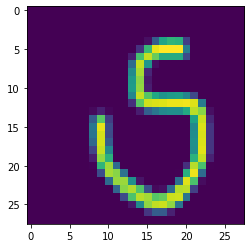

In [ ]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(i, "的機率是:", round(p, 3))
plt.imshow(img_np)